In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import IQP, EfficientSU2
from qiskit.circuit.parametervector import ParameterVector, ParameterVectorElement
from qiskit.circuit import Parameter
from qiskit import quantum_info as qiskit_info
from qiskit.circuit.random import random_circuit
from qiskit import Aer
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_hinton
from qiskit.extensions import UnitaryGate
import matplotlib.pyplot as plt
from qiskit import IBMQ, Aer, assemble, transpile
import scipy.linalg as ln
import math 
%matplotlib inline
import random
from math import pi
import struct
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, amplitude_damping_error
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.providers.aer.noise import amplitude_damping_error
from qiskit.providers.aer.noise import NoiseModel
from qiskit.quantum_info import DensityMatrix
import numpy as np
import numpy as np

from qiskit import QuantumCircuit
from qiskit.circuit.library import IQP, EfficientSU2
from qiskit.circuit.parametervector import ParameterVector, ParameterVectorElement
from qiskit.circuit import Parameter
from qiskit import quantum_info as qiskit_info
from qiskit.circuit.random import random_circuit
from qiskit import Aer
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_hinton
from qiskit.extensions import UnitaryGate
import matplotlib.pyplot as plt
from qiskit import IBMQ, Aer, assemble, transpile
import scipy.linalg as ln
import math 
%matplotlib inline
import random
from math import pi
import struct
from circuit_generator import QCircuit_to_layers
from circuit_generator import my_random_circuit

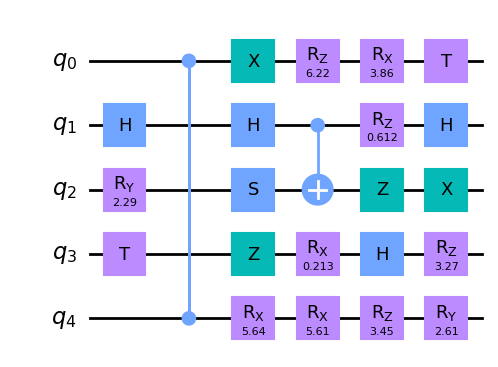

In [12]:
qc = my_random_circuit(5,5, measure=False)
qc.draw(output='mpl')
qc.save_density_matrix()

In [14]:
def simulate_with_damping(gamma1, gamma2, qc):
    
    #noise model with amplitude damping
    error = amplitude_damping_error(gamma1)
    noise_model = NoiseModel()
    for gate in ['id', 'h', 'x', 'y', 'z', 's', 't', 'rx', 'ry', 'rz', 'p']:
        noise_model.add_all_qubit_quantum_error(error, [gate])
    #print(error)
    error_aux=amplitude_damping_error(gamma2)
    error2 = error_aux.tensor(error_aux)
    for gate in ['cx', 'cz', 'cp']:
        noise_model.add_all_qubit_quantum_error(error2, [gate])

    sim = AerSimulator(noise_model=noise_model, method='density_matrix')
    qc_t = transpile(qc, sim) #versão do circuito que roda em sim, com o noise model

    result = sim.run(qc_t).result()
    rho = DensityMatrix(result.data(0)['density_matrix'])

    probs = rho.probabilities_dict()

    print(f"Gamma = {gamma1, gamma2}")
    for state in sorted(probs):
        print(f"  |{state}>: {probs[state]:.6f}")
    print("-" * 30)

# Testar para diferentes gammas
simulate_with_damping(0,0,qc)  # Sem ruído (ideal)
simulate_with_damping(0.01,0.1,qc)
#simulate_with_damping(0.5,0.6)
simulate_with_damping(1.0,1.0,qc)


Gamma = (0, 0)
  |00000>: 0.057363
  |00001>: 0.008132
  |00010>: 0.057363
  |00011>: 0.008132
  |00100>: 0.011816
  |00101>: 0.001675
  |00110>: 0.011816
  |00111>: 0.001675
  |01000>: 0.057363
  |01001>: 0.008132
  |01010>: 0.057363
  |01011>: 0.008132
  |01100>: 0.011816
  |01101>: 0.001675
  |01110>: 0.011816
  |01111>: 0.001675
  |10000>: 0.124196
  |10001>: 0.017607
  |10010>: 0.124196
  |10011>: 0.017607
  |10100>: 0.025583
  |10101>: 0.003627
  |10110>: 0.025583
  |10111>: 0.003627
  |11000>: 0.124196
  |11001>: 0.017607
  |11010>: 0.124196
  |11011>: 0.017607
  |11100>: 0.025583
  |11101>: 0.003627
  |11110>: 0.025583
  |11111>: 0.003627
------------------------------
Gamma = (0.01, 0.1)
  |00000>: 0.054190
  |00001>: 0.007509
  |00010>: 0.053117
  |00011>: 0.007360
  |00100>: 0.019627
  |00101>: 0.002720
  |00110>: 0.019239
  |00111>: 0.002666
  |01000>: 0.053117
  |01001>: 0.007360
  |01010>: 0.052065
  |01011>: 0.007214
  |01100>: 0.019239
  |01101>: 0.002666
  |01110>: 0.0